## The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

### Compute the camera matrix and distortion coefficients

In [29]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

def cameraMatandCoe():

    # Number of corners in the x and y 
    nx = 9
    ny = 6

    objectPoints = [] # The 3D points in the real world
    imagePoints = [] # The 2D points in an image plane

    # Make a list of calibration images
    images = glob.glob('camera_cal/calibration*.jpg')

    # Preparing the object points
    objp = np.zeros((6*9,3), np.float32)

    # Prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
    objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)
    i = 0
    imglist = []
    # go through each image in the list
    for fname in images:

        img = cv2.imread(fname)

        # Convert image to grayscale
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

        if ret == True:
            imagePoints.append(corners)
            objectPoints.append(objp)

            img = cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
            imglist.append(img)
        else:
            i += 1

    # Test the undistortion on an image
    img = cv2.imread('camera_cal\calibration1.jpg')


    # Calibrate the camera
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objectPoints, imagePoints, img.shape[0:2], None, None)

    # Find the destination image
    dst = cv2.undistort(img, mtx, dist, None, mtx)

#     # Visualize undistortion
#     f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
#     ax1.imshow(img)
#     ax1.set_title('Original Image', fontsize=30)
#     ax2.imshow(dst)
#     ax2.set_title('Undistorted Image', fontsize=30)
    return dst, mtx, dist
dst, mtx, dist = cameraMatandCoe()

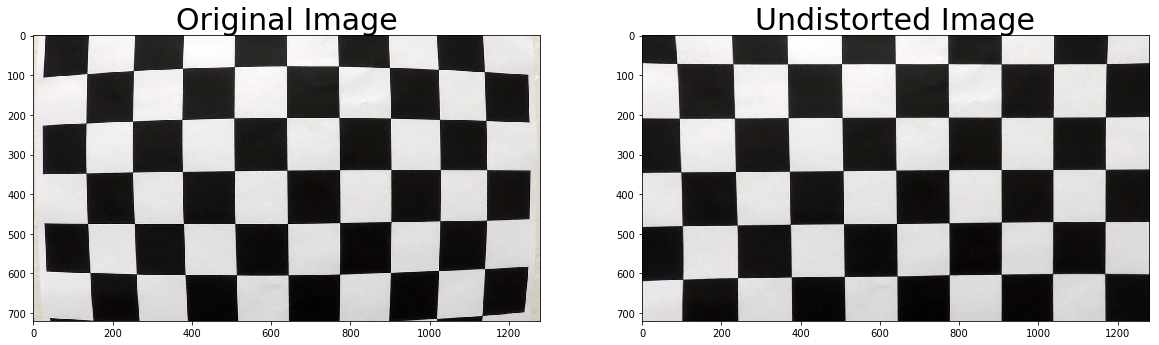

In [30]:
# # Here is the original raw image from the camera and the undistorted image
# image = cv2.imread('test_images/test5.jpg')
# img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# dst, mtx = cameraMatandCoe()
# unDst = cv2.undistort(img, mtx, dist, None, mtx)
# # Visualize undistortion
# f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
# ax1.imshow(img)
# ax1.set_title('Original Image', fontsize=30)
# ax2.imshow(unDst)
# ax2.set_title('Undistorted Image', fontsize=30)

def undistortImg(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     dst, mtx, dist = cameraMatandCoe()
    unDst = cv2.undistort(img, mtx, dist, None, mtx)
    return unDst
test = cv2.imread('camera_cal/calibration1.jpg')
testRgb = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
temp = undistortImg(test)
# Visualize result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(testRgb)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(temp)
ax2.set_title('Undistorted Image', fontsize=30)

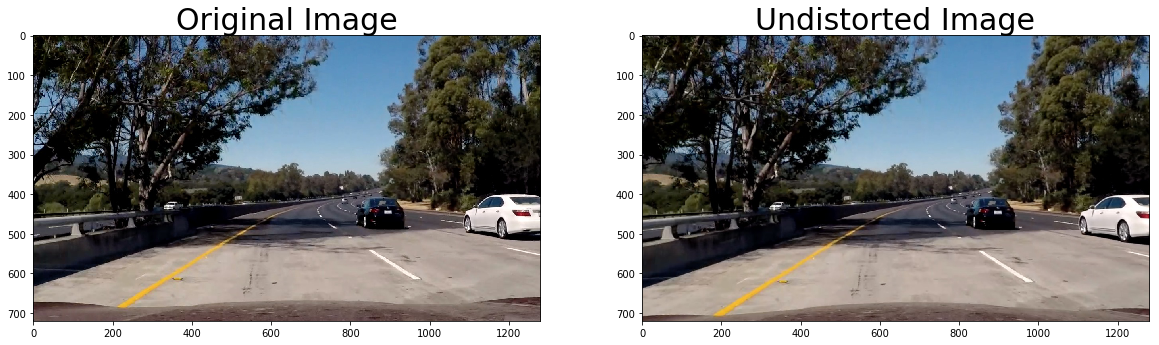

In [31]:
# Now show how the undistortion function works on a test image
testImg = cv2.imread('test_images/test5.jpg')
testImgRgb = cv2.cvtColor(testImg, cv2.COLOR_BGR2RGB)
result = undistortImg(testImg)
# Visualize result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(testImgRgb)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(result)
ax2.set_title('Undistorted Image', fontsize=30)

In [32]:
# # Now we are going to apply a combination of color and gradient thresholds to find the rectify binary image


# # Convert to HLS color space and separate the S channel
# # Note: img is the undistorted image
# hls = cv2.cvtColor(unDst, cv2.COLOR_RGB2HLS)
# h_channel = hls[:,:,0]
# l_channel = hls[:,:,1]
# s_channel = hls[:,:,2]

# thresh = (90, 255)
# s_binar = np.zeros_like(s_channel)
# s_binar[(s_channel > thresh[0]) & (s_channel <= thresh[1])] = 1


# # Use HLS color space and focus using the 

# def abs_sobel_thresh(img, orient, sobel_kernel=3, thresh=(0, 255)):
#     # Calculate directional gradient
#     # Apply threshold
    
#      # Apply the following steps to img
#     # 1) Convert to grayscale
#     gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#     # 2) Take the derivative in x or y given orient = 'x' or 'y'
#     if orient == 'x':
#         sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
#     else:
#         sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
#     # 3) Take the absolute value of the derivative or gradient
#     abs_sobel = np.absolute(sobel)
#     # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
#     scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
#     # 5) Create a mask of 1's where the scaled gradient magnitude 
#             # is > thresh_min and < thresh_max
#     sbinary = np.zeros_like(scaled_sobel)
#     sbinary[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
#     # 6) Return this mask as your binary_output image
#     return sbinary

# def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
#     # Calculate gradient magnitude
#     # Apply threshold
    
#      # Apply the following steps to img
#     # 1) Convert to grayscale
#     gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#     # 2) Take the gradient in x and y separately
#     sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
#     sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
#     # 3) Calculate the magnitude 
#     mag = np.sqrt(sobelx**2 + sobely**2)
#     # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
#     scaled_sobel = np.uint8(255*mag/np.max(mag))
#     # 5) Create a binary mask where mag thresholds are met
#     sxbinary = np.zeros_like(mag)
#     # 6) Return this mask as your binary_output image
#     sxbinary[(scaled_sobel >= mag_thresh[0]) & (scaled_sobel <= mag_thresh[1])] = 1
#     return sxbinary

# def dir_threshold(image, sobel_kernel=3, thresh=(0, np.pi/2)):
#     # Calculate gradient direction
#     # Apply threshold
    
#     # Apply the following steps to img
#     # 1) Convert to grayscale
#     gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#     # 2) Take the gradient in x and y separately
#     sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = sobel_kernel)
#     sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize = sobel_kernel)
#     # 3) Take the absolute value of the x and y gradients
#     abs_sobelx = np.absolute(sobelx)
#     abs_sobely = np.absolute(sobely)
#     # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
#     arctan = np.arctan2(abs_sobely, abs_sobelx)
#     # 5) Create a binary mask where direction thresholds are met
#     binaryMask = np.zeros_like(arctan)
#     binaryMask[(arctan >= thresh[0]) & (arctan <= thresh[1])] = 1
#     # 6) Return this mask as your binary_output image
#     return binaryMask


# # Choose a Sobel kernel size
# ksize = 3 # Choose a larger odd number to smooth gradient measurements

# # Apply each of the thresholding functions
# gradx = abs_sobel_thresh(unDst, orient='x', sobel_kernel=ksize, thresh=(10, 100))
# #plt.imshow(gradx, cmap = 'gray')
# grady = abs_sobel_thresh(unDst, orient='y', sobel_kernel=ksize, thresh=(10, 100))
# mag_binary = mag_thresh(unDst, sobel_kernel=ksize, mag_thresh=(30, 100))
# dir_binary = dir_threshold(unDst, sobel_kernel=ksize, thresh=(0.7, 1.3))

# combined = np.zeros_like(dir_binary)
# combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

# # Combine the two binary thresholds
# combined_binary = np.zeros_like(s_binar)
# combined_binary[(s_binar == 1) | (combined == 1)] = 1
# plt.imshow(combined_binary, cmap = 'gray')

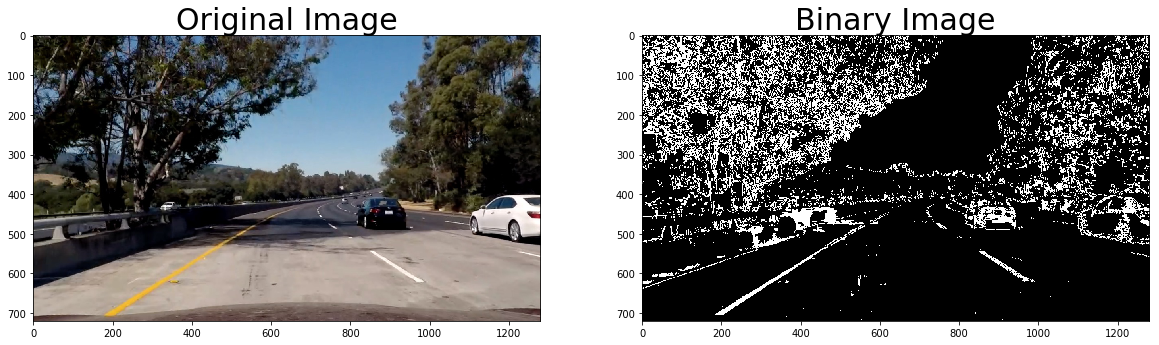

In [33]:

def cvtToBinary(unDst):
    # Convert to HLS color space and separate the S channel
    # Note: img is the undistorted image
    hls = cv2.cvtColor(unDst, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]

    # Grayscale image
    # NOTE: we already saw that standard grayscaling lost color information for the lane lines
    # Explore gradients in other colors spaces / color channels to see what might work better
    gray = cv2.cvtColor(unDst, cv2.COLOR_RGB2GRAY)

    # Sobel x
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

    # Threshold x gradient
    thresh_min = 20
    thresh_max = 100
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

    # Threshold color channel
    s_thresh_min = 170
    s_thresh_max = 255
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh_min) & (s_channel <= s_thresh_max)] = 1

    # Stack each channel to view their individual contributions in green and blue respectively
    # This returns a stack of the two binary images, whose components you can see as different colors
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary))

    # Combine the two binary thresholds
    combined_binary = np.zeros_like(sxbinary)
    combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1

    return combined_binary
binary = cvtToBinary(result)

#Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(result)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(binary, cmap='gray')
ax2.set_title('Binary Image', fontsize=30)

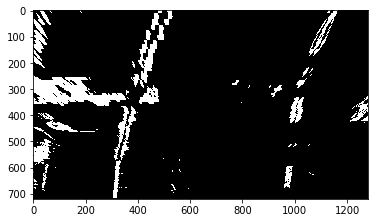

In [34]:
# Apply perspective transform





#Combination of both hough lines and normal image
#comboImage =  weighted_img(houghTransform, initial_image, α=0.8, β=1., λ=0.)
def perspectiveTrans(img, binary):
    
    # Define the source and destination points
    src = np.float32(
    [[180, 720], # Bottom Left
    [1125, 720], # Bottom Right
    [585, 450],  # Top Left
    [690, 450]]) # Rop Right
    dst = np.float32(
    [[320, 720],
    [960, 720],
    [320, 0],
    [960, 0]])

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_size = (gray.shape[1], gray.shape[0])
    # Calculate the perspective transform matrix
    M = cv2.getPerspectiveTransform(src, dst)
    # Calculate the inverse perspective transform
    Minv = cv2.getPerspectiveTransform(dst, src)
    # Warp an image
    warped = cv2.warpPerspective(binary, M, img_size)
    
    return M, Minv, warped
parm1, parm2, parm3 = perspectiveTrans(testImgRgb,binary)
plt.imshow(parm3, cmap='gray')
# Draw the lines for the points of interest (source)
# # Left line
# cv2.line(draws, (src[0][0], src[0][1]), (src[2][0], src[2][1]), (255,0,0), thickness = 5)
# # Right Line
# cv2.line(draws, (src[1][0], src[1][1]), (src[3][0], src[3][1]), (255,0,0), thickness = 5)
# # Bottom Line
# cv2.line(draws, (src[0][0], src[0][1]), (src[1][0], src[1][1]), (255,0,0), thickness = 5)
# # Top Line
# cv2.line(draws, (src[2][0], src[2][1]), (src[3][0], src[3][1]), (255,0,0), thickness = 5)

# # Draw the lines for the destiation 
# # Left Line
# cv2.line(draws, (dst[0][0], dst[0][1]), (dst[2][0], dst[2][1]), (255,0,0), thickness = 5)
# # Right Line
# cv2.line(draws, (dst[1][0], dst[1][1]), (dst[3][0], dst[3][1]), (255,0,0), thickness = 5)
# # Bottom Line
# cv2.line(draws, (dst[0][0], dst[0][1]), (dst[1][0], dst[1][1]), (255,0,0), thickness = 5)
# # Top Line
# cv2.line(draws, (dst[2][0], dst[2][1]), (dst[3][0], dst[3][1]), (255,0,0), thickness = 5)


# # Visualize undistortion
# f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
# ax1.imshow(binary, cmap = 'gray')
# ax1.set_title('Original Image', fontsize=30)
# ax2.imshow(warpedImg, cmap = 'gray')
# ax2.set_title('Warped Image', fontsize=30)

In [35]:
# image = cv2.imread('test_images/straight_lines2.jpg')
# undImg = undistortImg(image)
# draws = undImg

# src = np.float32(
#     [[180, 720], # Bottom Left
#     [1125, 720], # Bottom Right
#     [585, 450],  # Top Left
#     [690, 450]]) # Rop Right
# dst = np.float32(
#     [[320, 720],
#     [960, 720],
#     [320, 0],
#     [960, 0]])

# #Draw the lines for the points of interest (source)
# # Left line
# cv2.line(draws, (src[0][0], src[0][1]), (src[2][0], src[2][1]), (255,0,0), thickness = 5)
# # Right Line
# cv2.line(draws, (src[1][0], src[1][1]), (src[3][0], src[3][1]), (255,0,0), thickness = 5)
# # Bottom Line
# cv2.line(draws, (src[0][0], src[0][1]), (src[1][0], src[1][1]), (255,0,0), thickness = 5)
# # Top Line
# cv2.line(draws, (src[2][0], src[2][1]), (src[3][0], src[3][1]), (255,0,0), thickness = 5)

# # Draw the lines for the destiation 
# # Left Line
# cv2.line(draws, (dst[0][0], dst[0][1]), (dst[2][0], dst[2][1]), (255,0,0), thickness = 5)
# # Right Line
# cv2.line(draws, (dst[1][0], dst[1][1]), (dst[3][0], dst[3][1]), (255,0,0), thickness = 5)
# # Bottom Line
# cv2.line(draws, (dst[0][0], dst[0][1]), (dst[1][0], dst[1][1]), (255,0,0), thickness = 5)
# # Top Line
# cv2.line(draws, (dst[2][0], dst[2][1]), (dst[3][0], dst[3][1]), (255,0,0), thickness = 5)
# plt.imshow(draws)

In [40]:
# Find the lane lines using a histogram


def findLaneLines(warpedImg):
    # Create a historgram of the bottom half of the warped binary image
    indicies = np.int(warpedImg.shape[0]/2)
    histogram = np.sum(warpedImg[indicies:,:], axis=0)
    # Create an image to draw on
    outputImg = np.dstack((warpedImg, warpedImg, warpedImg))*255
    
    
    #Save initial points where the peaks are for the left and right half of the histogram
    midpoint = np.int(histogram.shape[0]/2)
    leftxBase = np.argmax(histogram[:midpoint])
    rightxBase = np.argmax(histogram[midpoint:]) + midpoint

    # Set how many windows to fill vertically the whole frame
    numOfWindows = 9

    # Set the window height
    windowHeight = np.int(warpedImg.shape[0]/numOfWindows)

    # Store all the none 0 pixels of each axis
    notZero = warpedImg.nonzero()
    notZeroy = np.array(notZero[0])
    notZerox = np.array(notZero[1])

    # Keep track of the current positions
    leftxCurrent = leftxBase
    rightxCurrent = rightxBase

    #80
    margin = 120
    #25
    minpix = 10

    leftLaneInds = []
    rightLaneInds = []

    # Step through every window
    for window in range(numOfWindows):
        # Find window boundaries
        winyLow = warpedImg.shape[0] - (window + 1)*windowHeight
        winyHigh = warpedImg.shape[0] - window*windowHeight
        winxLeftLow = leftxCurrent - margin
        winxLeftHigh = leftxCurrent + margin
        winxRightLow = rightxCurrent - margin
        winxRightHigh = rightxCurrent + margin

        # Draw the windows
        cv2.rectangle(outputImg,(winxLeftLow,winyLow),(winxLeftHigh,winyHigh), (0,255,0), 2)
        cv2.rectangle(outputImg,(winxRightLow,winyLow),(winxRightHigh,winyHigh), (0,255,0), 2)

        # Find and store the hot pixels
    #         good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
    #         good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        leftInd = ((notZeroy >= winyLow) & (notZeroy < winyHigh) & (notZerox >= winxLeftLow) & (notZerox < winxLeftHigh)).nonzero()[0]
        rightInd = ((notZeroy >= winyLow) & (notZeroy < winyHigh) & (notZerox >= winxRightLow) & (notZerox < winxRightHigh)).nonzero()[0]
        leftLaneInds.append(leftInd)
        rightLaneInds.append(rightInd)
        if len(leftInd) > minpix:
            leftxCurrent = np.int(np.mean(notZerox[leftInd]))
        if len(rightInd) > minpix:
            rightxCurrent = np.int(np.mean(notZerox[rightInd]))

    # Concatenate the arrays of the indicies
    leftLaneInds = np.concatenate(leftLaneInds)
    rightLaneInds = np.concatenate(rightLaneInds)

    # Extract left and right line pixels
    leftx = notZerox[leftLaneInds]
    lefty = notZeroy[leftLaneInds]
    rightx = notZerox[rightLaneInds]
    righty = notZeroy[rightLaneInds]

    # Fit a line to each
    leftFit = np.polyfit(lefty, leftx, 2)
    rightFit = np.polyfit(righty, rightx, 2)
    
     # Generate x and y values for plotting
    ploty = np.linspace(0,warpedImg.shape[0]-1, warpedImg.shape[0])
    leftFitx = leftFit[0]*ploty**2 + leftFit[1]*ploty + leftFit[2]
    rightFitx = rightFit[0]*ploty**2 + rightFit[1]*ploty + rightFit[2]
    return leftLaneInds, rightLaneInds, leftx, lefty, rightx, righty, leftFit, rightFit, outputImg, notZerox, notZeroy, ploty, leftFitx, rightFitx
leftLaneInds, rightLaneInds, leftx, lefty, rightx, righty, leftFit, rightFit, outputImg, notZerox, notZeroy, ploty, leftFitx, rightFitx = findLaneLines(parm3)   

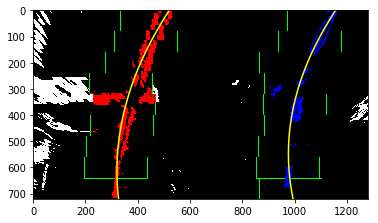

In [42]:
## visualize the lines
def viewLaneLines(leftLaneInds, rightLaneInds, leftFit, rightFit, warpedImg, outputImg, notZerox, notZeroy):
    ploty = np.linspace(0, warpedImg.shape[0]-1, warpedImg.shape[0] )
    leftFitx = leftFit[0]*ploty**2 + leftFit[1]*ploty + leftFit[2]
    rightFitx = rightFit[0]*ploty**2 + rightFit[1]*ploty + rightFit[2]

    outputImg[notZeroy[leftLaneInds], notZerox[leftLaneInds]] = [255, 0, 0]
    outputImg[notZeroy[rightLaneInds], notZerox[rightLaneInds]] = [0, 0, 255]
    plt.imshow(outputImg)
    plt.plot(leftFitx, ploty, color='yellow')
    plt.plot(rightFitx, ploty, color='yellow')
    plt.xlim(0, 1280)
    plt.ylim(720, 0)
    return
viewLaneLines(leftLaneInds, rightLaneInds, leftFit, rightFit, parm3, outputImg, notZerox, notZeroy)    

In [38]:
# If you already found a lane line before than use this to find the next
def findLaneLinesafterFindingThem():
    notZero = warpedImg.nonzero()
    notZeroy = np.array(notZero[0])
    notZerox = np.array(notZero[1])

    margin = 100

    leftLaneInds = ((notZerox > (leftFit[0]*(notZeroy**2) + leftFit[1]*notZeroy + leftFit[2] - margin)) & (notZerox < (leftFit[0]*(notZeroy**2) + leftFit[1]*notZeroy + leftFit[2] + margin)))
    rightLaneInds = ((notZerox > (rightFit[0]*(notZeroy**2) + rightFit[1]*notZeroy + rightFit[2] - margin)) & (notZerox < (rightFit[0]*(notZeroy**2) + rightFit[1]*notZeroy + rightFit[2] + margin)))

    # Get left and right lane line pixel positions
    leftx = notZerox[leftLaneInds]
    lefty = notZeroy[leftLaneInds]
    rightx = notZerox[rightLaneInds]
    righty = notZeroy[rightLaneInds]

    # Fit the line
    leftFit = np.polyfit(lefty, leftx, 2)
    rightFit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0,warpedImg.shape[0]-1, warpedImg.shape[0])
    leftFitx = leftFit[0]*ploty**2 + leftFit[1]*ploty + leftFit[2]
    rightFitx = rightFit[0]*ploty**2 + rightFit[1]*ploty + rightFit[2]


    ## Now visualize the rults
    outImg = np.dstack((warpedImg, warpedImg, warpedImg))*255
    windowImg = np.zeros_like(outImg)

    # Color in left and right line
    outImg[notZeroy[leftLaneInds], notZerox[leftLaneInds]] = [255,0,0]
    outImg[notZeroy[rightLaneInds], notZerox[rightLaneInds]] = [0,0,255]

    # Generate a polygon to illustrate the search window area and recast the x and y points into usable format for cv2.fillPoly()
    leftLinWindow1 = np.array([np.transpose(np.vstack([leftFitx-margin, ploty]))])
    leftLinWindow2 = np.array([np.flipud(np.transpose(np.vstack([leftFitx+margin, ploty])))])
    leftLinePts = np.hstack((leftLinWindow1, leftLinWindow2))
    rightLineWindow1 = np.array([np.transpose(np.vstack([rightFitx-margin, ploty]))])
    rightLineWindow2 = np.array([np.flipud(np.transpose(np.vstack([rightFitx+margin, ploty])))])
    rightLinePts = np.hstack((rightLineWindow1, rightLineWindow2))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(windowImg, np.int_([leftLinePts]), (0,255, 0))
    cv2.fillPoly(windowImg, np.int_([rightLinePts]), (0,255, 0))
    result = cv2.addWeighted(outImg, 1, windowImg, 0.3, 0)
    plt.imshow(result)
    plt.plot(leftFitx, ploty, color='yellow')
    plt.plot(rightFitx, ploty, color='yellow')
    plt.xlim(0, 1280)
    plt.ylim(720, 0)
    return


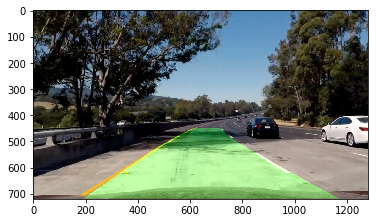

In [46]:
# We will warp the image back to image space and place highlight the lane
def highlightLane(warpedImg, leftFitx, rightFitx, ploty, invCamMat, unDst):

    # Create an image to draw the lines on
    warp_zero = np.zeros_like(warpedImg).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([leftFitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([rightFitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, invCamMat, (unDst.shape[1], unDst.shape[0])) 
    # Combine the result with the original image
    result = cv2.addWeighted(unDst, 1, newwarp, 0.3, 0)
    return result
highlightedImg = highlightLane(parm3, leftFitx, rightFitx, ploty, parm2, result)
plt.imshow(highlightedImg)

In [44]:
# Define conversions in x and y from pixels space to meters
def curvatureReadings(highlightedImg, ploty, leftFitx, rightFitx):

    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    yEval = 719
    # Fit new polynomials to x,y in world space
    left_fit_cr = np.polyfit(ploty*ym_per_pix, leftFitx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(ploty*ym_per_pix, rightFitx*xm_per_pix, 2)
    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*yEval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*yEval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    # Now our radius of curvature is in meters

    #Draw the text on the image
    font = cv2.FONT_HERSHEY_SIMPLEX
    st1 = str(left_curverad)
    st2 = str(right_curverad)
    cv2.putText(highlightedImg, 'leftCurve: ' + st1 + ' rightCurve: ' + st2 ,(10,100), font, 1,(255,255,255),2,cv2.LINE_AA)
    return highlightedImg

In [47]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [48]:
def process_image(image):
    # Undistor the image
    undImg = undistortImg(image)
    # Threshold and create a binary image
    binaryImg = cvtToBinary(undImg)
    # Here we apply the prespective transform in order to find lane lines
    M, Minv, warpedImg = perspectiveTrans(undImg, binaryImg)
    # Now we will search and find the lane lines using a histogram approach
    leftLaneInds, rightLaneInds, leftx, lefty, rightx, righty, leftFit, rightFit, outputImg, notZerox, notZeroy, ploty, leftFitx, rightFitx = findLaneLines(warpedImg)
    # Now we will highlight the lane
    highlightedLane = highlightLane(warpedImg, leftFitx, rightFitx, ploty, Minv, undImg)
    # Finally we will find the curvature
    result = curvatureReadings(highlightedLane, ploty, leftFitx, rightFitx)
    # return the BGR color image
    final = cv2.cvtColor(result, cv2.COLOR_RGB2BGR)
    return final

In [ ]:
## test process_image function
# image = cv2.imread('test_images/test6.jpg')
# leftLaneInds, rightLaneInds, leftFit, rightFit, warpedImg, outputImg, notZerox, notZeroy = process_image(image)

In [ ]:
# viewLaneLines(leftLaneInds, rightLaneInds, leftFit, rightFit, warpedImg, outputImg, notZerox, notZeroy)
# plt.imshow(warp, cmap='gray')
# plt.imshow(test)
# viewLaneLines(leftLaneInds, rightLaneInds, leftFit, rightFit, warpedImg, outputImg, notZerox, notZeroy)

In [ ]:
# step through each image
video = 'result_video.mp4'
clip1 = VideoFileClip("project_video.mp4")
project_clip = clip1.fl_image(process_image)
%time project_clip.write_videofile(video, audio=False)

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(video))